# Sentiment Analysis Using Textblob - Aniket

In [78]:
import pandas as pd
import numpy as np
import os
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import normalize

In [79]:
from textblob import TextBlob

## Inferno - Sentiment Analysis

In [80]:
inferno_averages_per_canto = []

for file in os.listdir('Dante_DivineComedy/Inferno/'):
    text = open("Dante_DivineComedy/Inferno/{}".format(file), 'r')
    blob = TextBlob(' '.join(text.readlines()).strip('\n').strip("\t").lower())
    
    sentiment_for_canto = []
    for sentence in blob.sentences:
        sentiment_for_canto.append(sentence.sentiment.polarity)
        
    average = np.mean(sentiment_for_canto)
    inferno_averages_per_canto.append(average)

In [81]:
df_inferno = pd.DataFrame()
df_inferno['Sentiment'] = inferno_averages_per_canto / np.linalg.norm(inferno_averages_per_canto)
num_of_cantos = len(inferno_averages_per_canto)
canto_num = np.linspace(1, num_of_cantos, 34)
print(canto_num)
df_inferno['Canto'] = canto_num

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34.]


(1, 34)

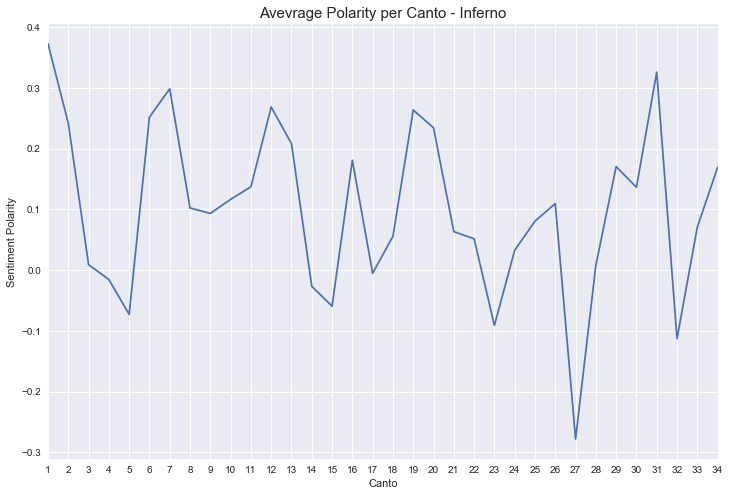

In [82]:
plt.figure(figsize = (12,8))
plt.plot(df_inferno['Canto'], df_inferno['Sentiment'])
plt.title("Avevrage Polarity per Canto - Inferno", fontsize = 15)
plt.xlabel("Canto")
plt.ylabel("Sentiment Polarity")
plt.xticks(np.linspace(1,34,34))
plt.xlim(1,34)

## Paradiso

In [83]:
paradiso_averages_per_canto = []

for file in os.listdir('Dante_DivineComedy/Paradiso/'):
    text = open("Dante_DivineComedy/Paradiso/{}".format(file), 'r')
    blob = TextBlob(' '.join(text.readlines()).strip('\n').strip("\t").lower())
    
    sentiment_for_canto = []
    for sentence in blob.sentences:
        sentiment_for_canto.append(sentence.sentiment.polarity)
        
    average = np.mean(sentiment_for_canto)
    paradiso_averages_per_canto.append(average)

In [84]:
df_paradiso = pd.DataFrame()
df_paradiso['Sentiment'] = paradiso_averages_per_canto / np.linalg.norm(paradiso_averages_per_canto)
num_of_cantos = len(paradiso_averages_per_canto)
canto_num = np.linspace(1, num_of_cantos, 33)
print(canto_num)
df_paradiso['Canto'] = canto_num

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33.]


(1, 33)

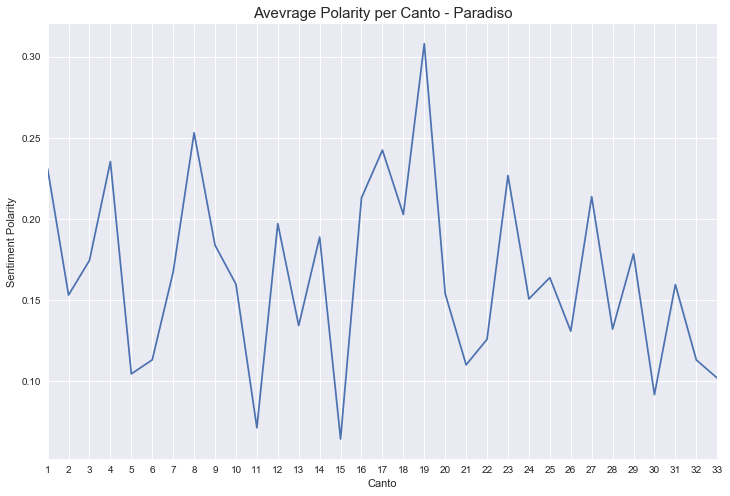

In [85]:
plt.figure(figsize = (12,8))
plt.plot(df_paradiso['Canto'], df_paradiso['Sentiment'])
plt.title("Avevrage Polarity per Canto - Paradiso", fontsize = 15)
plt.xlabel("Canto")
plt.ylabel("Sentiment Polarity")
plt.xticks(np.linspace(1,33,33))
plt.xlim(1,33)

## Purgatorio Analysis

In [86]:
purgatorio_averages_per_canto = []

for file in os.listdir('Dante_DivineComedy/Purgatorio/'):
    text = open("Dante_DivineComedy/Purgatorio/{}".format(file), 'r')
    blob = TextBlob(' '.join(text.readlines()).strip('\n').strip("\t").lower())
    
    sentiment_for_canto = []
    for sentence in blob.sentences:
        sentiment_for_canto.append(sentence.sentiment.polarity)
        
    average = np.mean(sentiment_for_canto)
    purgatorio_averages_per_canto.append(average)

In [87]:
df_purgatorio = pd.DataFrame()
df_purgatorio['Sentiment'] = purgatorio_averages_per_canto / np.linalg.norm(purgatorio_averages_per_canto)
num_of_cantos = len(purgatorio_averages_per_canto)
canto_num = np.linspace(1, num_of_cantos, 33)
print(canto_num)
df_purgatorio['Canto'] = canto_num

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33.]


(1, 33)

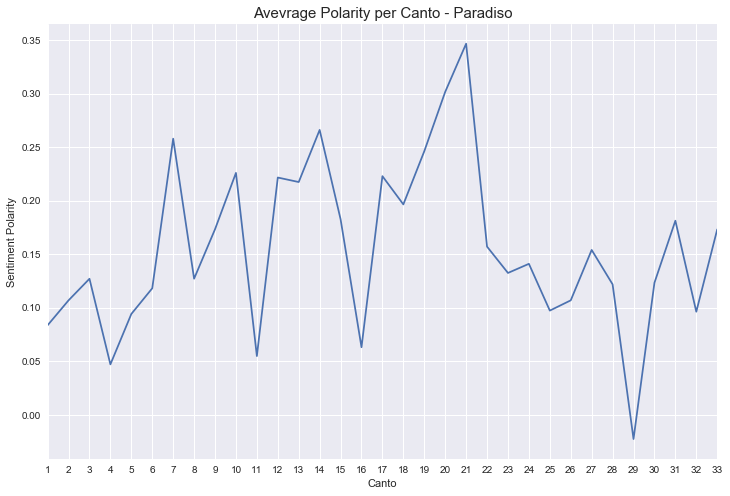

In [88]:
plt.figure(figsize = (12,8))
plt.plot(df_purgatorio['Canto'], df_purgatorio['Sentiment'])
plt.title("Avevrage Polarity per Canto - Paradiso", fontsize = 15)
plt.xlabel("Canto")
plt.ylabel("Sentiment Polarity")
plt.xticks(np.linspace(1,33,33))
plt.xlim(1,33)

# Composite Figure

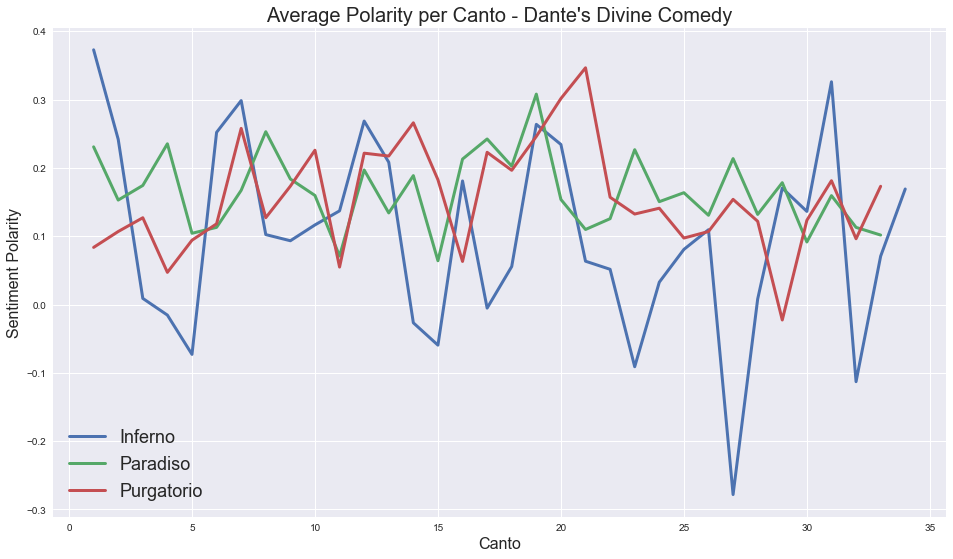

In [101]:
plt.figure(figsize = (16,9))
w = 3
plt.plot(df_inferno['Canto'], df_inferno['Sentiment'], label = "Inferno", linewidth = w)
plt.plot(df_paradiso['Canto'], df_paradiso['Sentiment'], label = "Paradiso", linewidth = w)
plt.plot(df_purgatorio['Canto'], df_purgatorio['Sentiment'], label = "Purgatorio", linewidth = w)
plt.legend(fontsize = 18)
plt.title("Average Polarity per Canto - Dante's Divine Comedy", fontsize = 20)
plt.xlabel("Canto", fontsize = 16)
plt.ylabel("Sentiment Polarity", fontsize = 16)
plt.show()

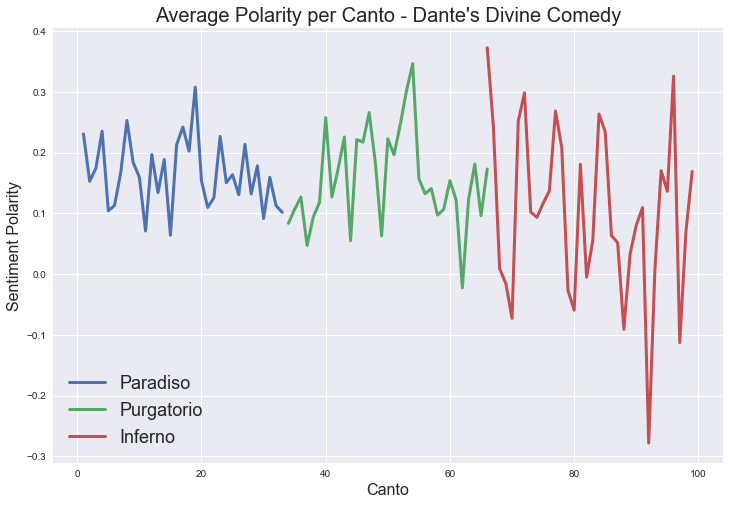

In [110]:
# order: paradise, purgatory, inferno
w = 3
plt.figure(figsize = (12,8))
plt.plot(df_paradiso['Canto'], df_paradiso['Sentiment'], label = "Paradiso", linewidth = w)
plt.plot([x + 33 for x in df_purgatorio['Canto']], df_purgatorio['Sentiment'], label = "Purgatorio", linewidth = w)
plt.plot([x + 65 for x in df_inferno['Canto']], df_inferno['Sentiment'], label = "Inferno", linewidth = w)
plt.legend(fontsize = 18)
plt.title("Average Polarity per Canto - Dante's Divine Comedy", fontsize = 20)
plt.xlabel("Canto", fontsize = 16)
plt.ylabel("Sentiment Polarity", fontsize = 16)
plt.show()